# Examples for the detection API

## Creating official darknet pretrained model

`darknet` is the original author of YOLOv2 architecture and has released several weights on his website : https://pjreddie.com/darknet/yolov2/. You can download some of them and use them !

Note that I support by default a 416x416 input image so make sure to take the right weights or adapt the model architecture to support the one you want. You can find links to weights for `COCO` and `Pascal VOC` pretrained models in the `README` file. Download weights and put them in the current directory. 

Note : I do not know why but the `Pascal VOC` pretrained model does not work properly. However it is not a problem because the `COCO` pretrained is trained on 80 classes which contains the 20 from `VOC` so you can simply use the `COCO` pretrained ! (the link to download `yolov2.weights` is in the README.md file)

In [1]:
from models.detection.yolo import YOLO, COCO_CONFIG, VOC_CONFIG

coco_model = YOLO.from_darknet_pretrained('yolov2.weights', nom = 'yolo_coco', ** COCO_CONFIG)

Weight file pretrained_models/yolo_backend/full_yolo_backend.h5 does not exist !
Initializing submodel : model !
Submodel model saved in pretrained_models\yolo_coco\saving\model.json !
Model yolo_coco initialized successfully !
Submodel model saved in pretrained_models\yolo_coco\saving\model.json !


## Demonstration of the API

The API is quite easy to use : put images you want to detect on (filename(s)), the model you want to use (its name) and that's it !

Note that it also works on videos where you can save the video with detection or even frame by frame or extract only detected objects !

**WARNING** : if you want to execute the 2nd cell to streammodel on your camera, you should execute the `limit_gpu_memory` function before initializing the model, otherwise it may be problematic for you graphic card as `cv2` also uses it. 

Note that the issue seems to not occur when using the multi-threaded behavior so you should only use it if you put `max_workers = -1`. Furthermore it will not damage your GPU, no worry ! ;)

The streaming API achieves between 15 (mono-threaded) and 25 (multi-threaded) fps, which is quite funny and impressive !

The `obj_threshold` argument represents the minimal score required to detect the object. The lower it is, the more object you will detect but with more mistakes.

In [2]:
from loggers import set_level
# If you want to log prediction's performances
set_level('time')

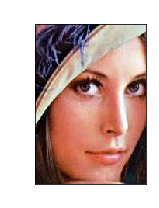

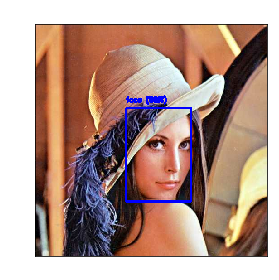

Timers for logger timer :
- Timers in thread MainThread-17176 :
  - predict : 0.565 sec
    - _init_dir executed 3 times : 0.000 sec (0.000 sec / exec)
- Timers in thread detection-13200 :
  - _detect : 0.009 sec
    - inference : 0.006 sec
- Timers in thread decoding-13468 :
  - _decode_with_update : 0.124 sec
    - output decoding : 0.124 sec
- Timers in thread drawing-13908 :
  - drawing : 0.006 sec
- Timers in thread _display-8908 :
  - _display : 0.420 sec
- Timers in thread saving-15720 :
  - saving : 0.000 sec


In [5]:
from models.detection import detect

_ = detect('lena.jpg', save = False, model = 'yolo_faces', verbose = 2, obj_threshold = 0.5, color = 'b')

In [ ]:
from models.detection import detect, stream
from utils import limit_gpu_memory, set_display_options

#limit_gpu_memory()
stream(model = 'yolo_faces', max_time = 15)

## Test pretrained model on its dataset

For this test, you need the `COCO` / `VOC` dataset installed. It is just an example, you do not have to reproduce it ;)

Note : I use the `VOC` dataset because it is faster to load and contains a subset of `COCO`'s classes.

Loading dataset voc...
2 boxes found :
0.1005 0.3532 0.4531 0.6366 13 0.5153
0.4580 0.4901 0.2204 0.4871 0 0.7447


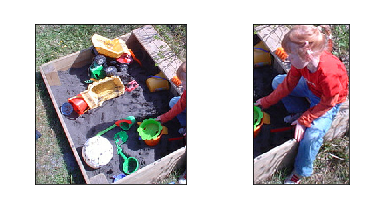

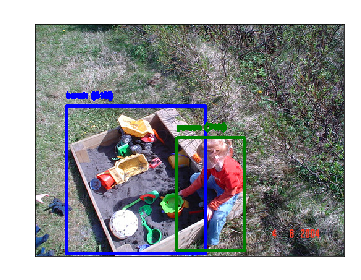

2 boxes found :
0.2541 0.1250 0.0989 0.2952 0 0.4988
0.1821 0.1453 0.1867 0.7561 0 0.7844


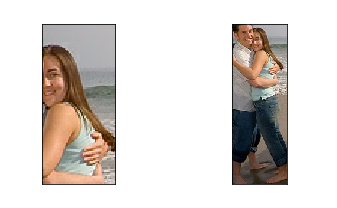

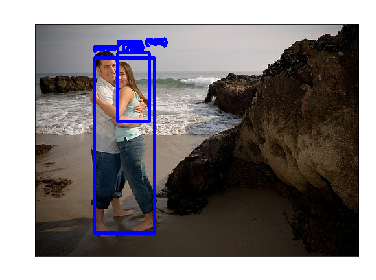

1 boxes found :
0.1069 0.2296 0.8217 0.3809 8 0.7860


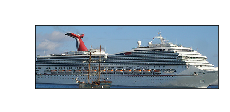

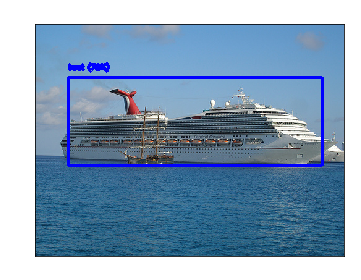

4 boxes found :
0.4224 0.0584 0.2229 0.7346 0 0.6361
0.1213 0.5919 0.0228 0.1351 27 0.5628
0.0157 0.4271 0.2179 0.4519 0 0.6876
0.1328 0.2906 0.7365 0.7075 17 0.6298


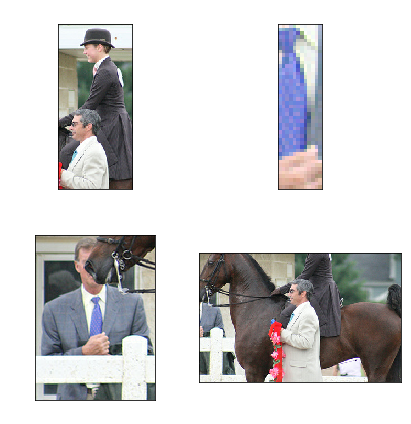

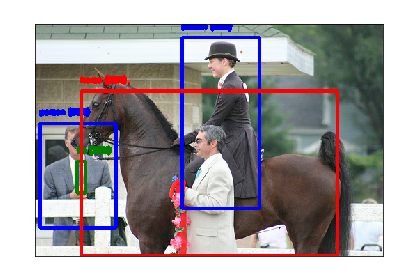

8 boxes found :
0.5385 0.0470 0.1386 0.1394 4 0.7898
0.5897 0.1842 0.1624 0.1178 4 0.7973
0.4181 0.2762 0.1756 0.1458 4 0.8364
0.6649 0.2770 0.1876 0.1480 4 0.7017
0.4827 0.4127 0.1864 0.1247 4 0.8295
0.5025 0.5572 0.1939 0.1406 4 0.7283
0.3167 0.6575 0.1943 0.1650 4 0.8522
0.3474 0.8070 0.1939 0.1482 4 0.8069


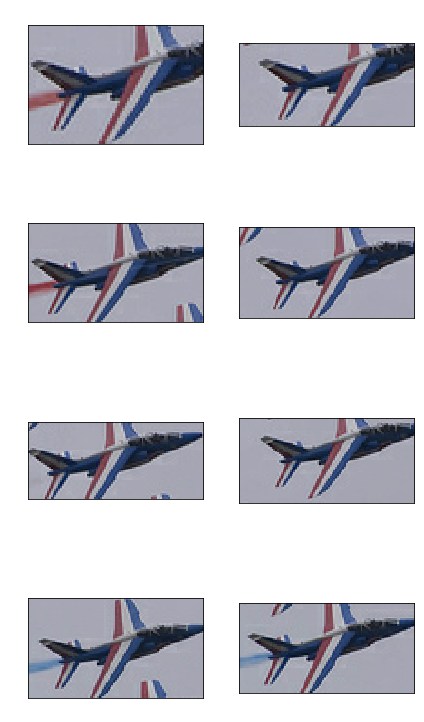

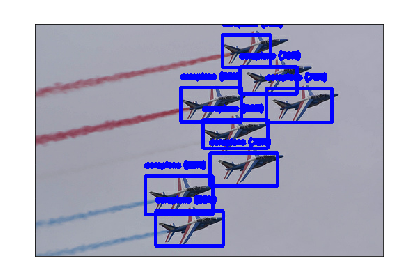

In [2]:
from datasets import get_dataset
from models.detection import detect

#coco = get_dataset('coco')
voc = get_dataset('voc')

_ = detect(voc.sample(5, random_state = 0), model = 'yolo_coco', save = False, verbose = 3)